<a href="https://colab.research.google.com/github/blacksaturn1/SwarmIntelligence_PSO/blob/main/SwarmIntelligence_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rastrigin function
def rastrigin(x):
    n = len(x)
    return 10*n + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in x])

# Define the PSO algorithm
def pso(cost_func, dim=2, num_particles=30, max_iter=100, w=1.0, c1=1.5, c2=1.5,inertiaAlgorithm=1):
    # Initialize particles and velocities
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    if inertiaAlgorithm==1 or inertiaAlgorithm==2:
      inertia_w = w
      print ("START: ", inertia_w)
    elif inertiaAlgorithm==3:
      inertia_w=np.random.uniform(0, 1)
      print ("RANDOM: ", inertia_w)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):

        if inertiaAlgorithm==2:
            inertia_w = 1.0 - (i / max_iter)
            # print (inertia_w)


        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = inertia_w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions
        particles += velocities

        # Evaluate fitness of each particle
        fitness_values = np.array([cost_func(p) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, swarm_best_fitness


START:  1
Solution: [ 6.53304440e+17  1.21320524e+19 -8.50566144e+17  7.07513920e+20
  1.60075973e+16]
Fitness: 25.416359628057727


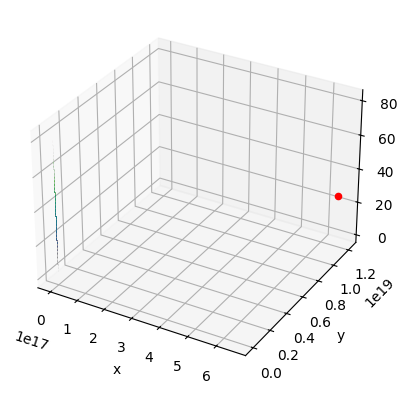

START:  1
1.0
0.999
0.998
0.997
0.996
0.995
0.994
0.993
0.992
0.991
0.99
0.989
0.988
0.987
0.986
0.985
0.984
0.983
0.982
0.981
0.98
0.979
0.978
0.977
0.976
0.975
0.974
0.973
0.972
0.971
0.97
0.969
0.968
0.967
0.966
0.965
0.964
0.963
0.962
0.961
0.96
0.959
0.958
0.957
0.956
0.955
0.954
0.953
0.952
0.951
0.95
0.949
0.948
0.947
0.946
0.945
0.944
0.943
0.942
0.9410000000000001
0.94
0.9390000000000001
0.938
0.937
0.9359999999999999
0.935
0.9339999999999999
0.933
0.9319999999999999
0.931
0.9299999999999999
0.929
0.928
0.927
0.926
0.925
0.924
0.923
0.922
0.921
0.92
0.919
0.918
0.917
0.916
0.915
0.914
0.913
0.912
0.911
0.91
0.909
0.908
0.907
0.906
0.905
0.904
0.903
0.902
0.901
0.9
0.899
0.898
0.897
0.896
0.895
0.894
0.893
0.892
0.891
0.89
0.889
0.888
0.887
0.886
0.885
0.884
0.883
0.882
0.881
0.88
0.879
0.878
0.877
0.876
0.875
0.874
0.873
0.872
0.871
0.87
0.869
0.868
0.867
0.866
0.865
0.864
0.863
0.862
0.861
0.86
0.859
0.858
0.857
0.856
0.855
0.854
0.853
0.852
0.851
0.85
0.849
0.848
0.847
0.846

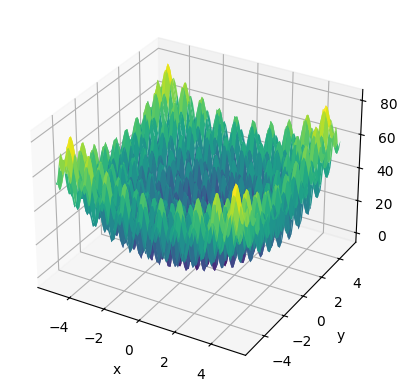

RANDOM:  0.35776700152241525
Solution: [ 9.94958637e-01 -1.24427716e-09  9.94958635e-01 -1.01704401e-09
  3.98043998e-09]
Fitness: 1.9899181141865796


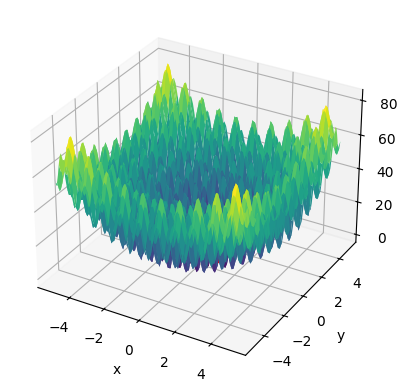

In [16]:
def display(solution,fitness):
  # Print the solution and fitness value
  print('Solution:', solution)
  print('Fitness:', fitness)

  # Create a meshgrid for visualization
  x = np.linspace(-5.12, 5.12, 100)
  y = np.linspace(-5.12, 5.12, 100)
  X, Y = np.meshgrid(x, y)
  Z = rastrigin([X, Y])

  # Create a 3D plot of the Rastrigin function
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  # Plot the solution found by the PSO algorithm
  ax.scatter(solution[0], solution[1], fitness, color='red')
  plt.show()



# Define the dimensions of the problem
dim = 5

# Run the PSO algorithm on the Rastrigin function
solution, fitness = pso(rastrigin, dim=dim,num_particles=100,max_iter=1000,inertiaAlgorithm=1,w=1)
display(solution,fitness)

solution, fitness = pso(rastrigin, dim=dim,num_particles=100,max_iter=1000,inertiaAlgorithm=2,w=1)
display(solution,fitness)

solution, fitness = pso(rastrigin, dim=dim,num_particles=100,max_iter=1000,inertiaAlgorithm=3,w=1)
display(solution,fitness)
